In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import sklearn
%matplotlib inline
import re

In [3]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


# Stuff for the begining

In [85]:
df_cars = pd.read_csv('cars.csv')
df_cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
#df_cars['CarNames']
#p = re.compile(r'\w+-?\w+')
#df_cars['car_company'] = df_cars['CarName'].apply(lambda x: re.findall(p, x)[0])
#df_cars['car_company'].replace({'alfa-romero':'alfa-romeo' ,'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                           # 'vokswagen': 'volkswagen', 'vw': 'volkswagen'},inplace = True)

df_ia = pd.read_csv('cars.csv')
df_ia['fueltype'] = df_ia['fueltype'].map({'gas':0,'diesel':1 })
df_ia['aspiration'] = df_ia['aspiration'].map({'std':0,'turbo':1 })
df_ia['doornumber'] = df_ia['doornumber'].map({'two':2,'four':4 })

df_ia.carbody.value_counts()

# Lalala

In [5]:
df_cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df_cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
df_cars.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

C:\Users\fuetu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


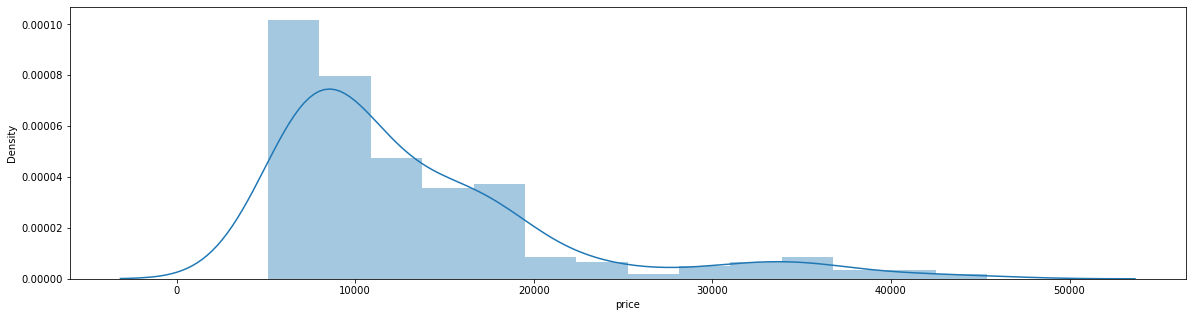

In [8]:
plt.figure(figsize=(20,5))
sns.distplot(df_cars['price'])
plt.show()

In [9]:
df_cars.CarName.nunique

<bound method IndexOpsMixin.nunique of 0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object>

In [10]:
import re

In [11]:
p = re.compile(r'\w+-?\w+')
df_cars['car_company'] = df_cars['CarName'].apply(lambda x: re.findall(p, x)[0])

In [12]:
df_cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [13]:
df_cars_no_id =df_cars.drop(['car_ID'], axis=1)
df_cars_no_id.shape

(205, 26)

In [14]:
df_cars_no_id = df_cars_no_id.drop_duplicates()
df_cars_no_id.shape

(205, 26)

In [15]:
df_meanprice = df_cars.groupby('CarName', as_index=False)['price'].mean()
df_meanprice['cat_price'] = pd.qcut(df_meanprice.price,q= 3,labels = ['cheap', 'medium', 'high'])
df_meanprice

,CarName,price,cat_price
0,Nissan versa,5499.0,cheap
1,alfa-romero Quadrifoglio,16500.0,high
2,alfa-romero giulia,13495.0,medium
3,alfa-romero stelvio,16500.0,high
4,audi 100 ls,13950.0,medium
...,...,...,...
142,volvo 246,22470.0,high
143,volvo 264gl,20522.5,high
144,volvo diesel,18950.0,high
145,vw dasher,11595.0,medium


In [16]:
df_cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'car_company'],
      dtype='object')

In [17]:
df_cars['cat_price'] = pd.qcut(df_cars.price,q= 3,labels = ['cheap', 'medium', 'high'])
df_cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,cat_price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,medium
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,high
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,high
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,high
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,high
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,high
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,high
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,high


# Ordinary Reglin

In [18]:
car_reglin = LinearRegression()
X = np.ones((len(df_cars), 2))
X[:, 1] = df_cars['curbweight']
Y = df_cars['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [19]:
car_reglin.fit(X_train, Y_train)

LinearRegression()

In [20]:
# on regarde les resultats : Les coefficients
a = car_reglin.coef_
a = a[1]
b = car_reglin.intercept_
print('Les coefficients trouves sont: \n', 'a =', a, ' et b = ', b)




# Evaluation du training set
Y_train_predict = car_reglin.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)
'''
# affichage des resultats de performance
print('La performance du modele sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
'''


# model evaluation for training set
y_train_predict = car_reglin.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
mae = mean_absolute_error(Y_train, y_train_predict)
print("\nThe model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Mean Absolut Error is {}'.format(mae))
print("\n")

# model evaluation for testing set
y_test_predict = car_reglin.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
mae = mean_absolute_error(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

print('Mean Absolut Error is {}'.format(mae))


Les coefficients trouves sont: 
 a = 12.582978838630023  et b =  -18970.49281249794

The model performance for training set
--------------------------------------
RMSE is 4248.302911449426
R2 score is 0.7038852996038018
Mean Absolut Error is 2758.974650214149


The model performance for testing set
--------------------------------------
RMSE is 4682.1646074536575
R2 score is 0.683584296334826
Mean Absolut Error is 2952.5016408263236


In [21]:
df_cars[['curbweight','price']] .describe()

,curbweight,price
count,205.000000,205.000000
mean,2555.565854,13276.710571
std,520.680204,7988.852332
min,1488.000000,5118.000000
25%,2145.000000,7788.000000
50%,2414.000000,10295.000000
75%,2935.000000,16503.000000
max,4066.000000,45400.000000


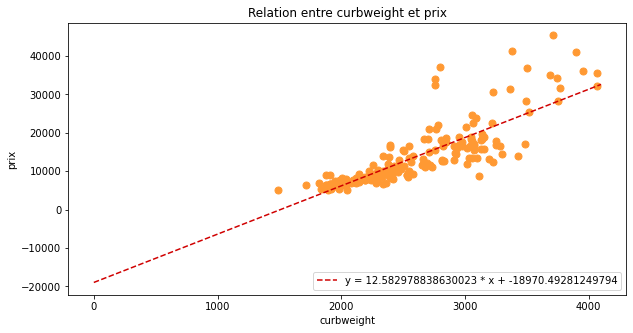

In [22]:
plt.figure(figsize=(10, 5))
plt.title("Relation entre curbweight et prix")
plt.xlabel('curbweight')
plt.ylabel('prix')
# parametrage de l'affichage du nuage de points :
plt.plot(df_cars['curbweight'], df_cars['price'],'ro', color = '#FF9933', markersize=7  )

# parametrage de l'affichage de la droite de regression linéaire de 0 à 2 :
plt.plot([0, 4100], [ b, b + (4100) * a], linestyle='--', c='#d00000' , label="y = {} * x + {}".format(a, b))

plt.legend(loc='lower right')


C:\Users\fuetu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


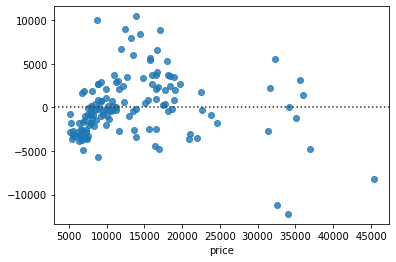

In [23]:
sns.residplot(Y_train, Y_train_predict)  
plt.show()

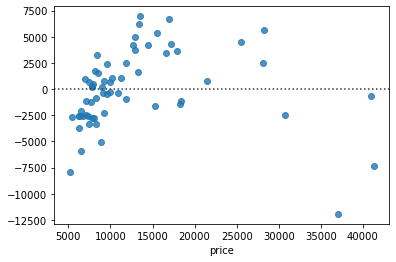

In [24]:
sns.residplot(Y_test, y_test_predict)  
plt.show()

# polynomial Reglin

In [25]:
from sklearn.preprocessing import PolynomialFeatures
car_reglin_poly = LinearRegression()
pf=PolynomialFeatures()     #Linear Equation of degree 2
X_poly=pf.fit_transform(X) 
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size = 0.2, random_state=42)
car_reglin_poly.fit(X_train, Y_train)
y_predict =car_reglin_poly.predict(X_test)

In [26]:
# model evaluation for training set
y_train_predict = car_reglin_poly.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
mae = mean_absolute_error(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Mean Absolut Error is {}'.format(mae))
print("\n")

# model evaluation for testing set
y_test_predict = car_reglin_poly.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
mae = mean_absolute_error(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

print('Mean Absolut Error is {}'.format(mae))

The model performance for training set
--------------------------------------
RMSE is 4271.204637187605
R2 score is 0.694100425965247
Mean Absolut Error is 2530.857319119502


The model performance for testing set
--------------------------------------
RMSE is 3959.939551925156
R2 score is 0.8013640415047325
Mean Absolut Error is 2465.1376134879742


# 2 Variables

In [27]:
car_reglin_2_var = LinearRegression()
X = df_cars[['curbweight','enginesize']]
Y = df_cars['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)
car_reglin_2_var.fit(X_train, Y_train)

LinearRegression()

In [28]:
# on regarde les resultats : Les coefficients
a = car_reglin_2_var.coef_
a = a[1]
b = car_reglin_2_var.intercept_
print('Les coefficients trouves sont: \n', 'a =', a, ' et b = ', b)


# model evaluation for training set
y_train_predict = car_reglin_2_var.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
mae = mean_absolute_error(Y_train, y_train_predict)
print("\nThe model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Mean Absolut Error is {}'.format(mae))
print("\n")

# model evaluation for testing set
y_test_predict = car_reglin_2_var.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
mae = mean_absolute_error(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

print('Mean Absolut Error is {}'.format(mae))

Les coefficients trouves sont: 
 a = 110.58871117989337  et b =  -14025.969729843599

The model performance for training set
--------------------------------------
RMSE is 3457.549772917743
R2 score is 0.8038601227150541
Mean Absolut Error is 2473.4295056181386


The model performance for testing set
--------------------------------------
RMSE is 3948.040935290623
R2 score is 0.7750282597729271
Mean Absolut Error is 2616.95566228835


In [29]:
import pickle
filename = 'car_reglin_2_var.sav'
pickle.dump(car_reglin_2_var, open(filename, 'wb'))

# Stuff to check if it's working with the couple given by the client

In [30]:
# Name of the model feed : car_reglin_2_var
type(X.iloc[1])
X.iloc[0].shape
X_client = X.iloc[0]
X.iloc[2]

curbweight    2823
enginesize     152
Name: 2, dtype: int64

In [31]:
X_client = np.matrix(X_client)
X_client

matrix([[2548,  130]], dtype=int64)

In [32]:
X_client = np.matrix([2832,152])
X_client

matrix([[2832,  152]])

In [33]:
car_reglin_2_var.predict(X_client)

array([17517.97469596])

In [34]:
car_reglin_2_var.predict(np.matrix(X.iloc[3]))

array([10187.25126579])

# 2 Variables Poly

In [35]:
car_reglin_2_var_poly = LinearRegression()
pf=PolynomialFeatures()     #Linear Equation of degree 2
X_poly=pf.fit_transform(X) 
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size = 0.2, random_state=42)
car_reglin_2_var_poly.fit(X_train, Y_train)
y_predict =car_reglin_2_var_poly.predict(X_test)

In [36]:
# model evaluation for training set
y_train_predict = car_reglin_2_var_poly.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
mae = mean_absolute_error(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Mean Absolut Error is {}'.format(mae))
print("\n")

# model evaluation for testing set
y_test_predict = car_reglin_2_var_poly.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
mae = mean_absolute_error(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

print('Mean Absolut Error is {}'.format(mae))

The model performance for training set
--------------------------------------
RMSE is 3526.9816463533575
R2 score is 0.791414308785239
Mean Absolut Error is 2481.279605954398


The model performance for testing set
--------------------------------------
RMSE is 3733.849085350854
R2 score is 0.8233985444771297
Mean Absolut Error is 2532.788346223695


C:\Users\fuetu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


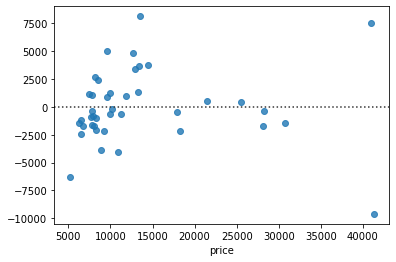

In [37]:
sns.residplot(Y_test, y_test_predict)  
plt.show()

# Save model

In [38]:
import pickle
filename = 'car_reglin_2_var_poly.sav'
pickle.dump(car_reglin_2_var_poly, open(filename, 'wb'))

In [39]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)
y_test_predict = loaded_model.predict(X_test)

In [40]:
print(r2_score(Y_test, y_test_predict))

0.8233985444771297


In [41]:
df_cars[['curbweight','enginesize']].describe()

,curbweight,enginesize
count,205.000000,205.000000
mean,2555.565854,126.907317
std,520.680204,41.642693
min,1488.000000,61.000000
25%,2145.000000,97.000000
50%,2414.000000,120.000000
75%,2935.000000,141.000000
max,4066.000000,326.000000


# Dataframe for all features

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import sklearn
%matplotlib inline
import re
from sklearn.preprocessing import OneHotEncoder

In [3]:
df_ia = pd.read_csv('cars.csv')
p = re.compile(r'\w+-?\w+')
df_ia.drop('car_ID',axis=1,inplace=True)
df_ia['car_company'] = df_ia['CarName'].apply(lambda x: re.findall(p, x)[0])
df_ia['car_company'].replace({'alfa-romero':'alfa-romeo' ,'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'},inplace = True)
df_ia['n_fueltype_is_diesel'] = df_ia['fueltype'].map({'gas':0,'diesel':1 })
df_ia['n_aspiration_is_turbo'] = df_ia['aspiration'].map({'std':0,'turbo':1 })
df_ia['n_doornumber'] = df_ia['doornumber'].map({'two':2,'four':4 })
df_ia['n_enginelocation_is rear'] = df_ia['enginelocation'].map({'front':0,'rear':1 })
df_ia['n_cylindernumber'] = df_ia['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':20, 'two':2, 'eight':8})
#old_columns = ['fueltype','aspiration','doornumber','enginelocation','cylindernumber']
onehotencoder = OneHotEncoder() 
for plop in ['enginetype','carbody','drivewheel','fuelsystem','car_company']:
    X = onehotencoder.fit_transform(df_ia[plop].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(X, columns = ["type_"+plop+"_"+ onehotencoder.categories_[0][i] for i in range(X.shape[1])]) 
    df_ia = pd.concat([df_ia, dfOneHot], axis=1)
df_ia_num = df_ia.select_dtypes(exclude=['object'])

In [7]:
for i in ['enginetype','carbody','drivewheel','fuelsystem','car_company']:
    print(df_ia[i].value_counts(ascending=True))

dohcv      1
rotor      4
dohc      12
l         12
ohcv      13
ohcf      15
ohc      148
Name: enginetype, dtype: int64
convertible     6
hardtop         8
wagon          25
hatchback      70
sedan          96
Name: carbody, dtype: int64
4wd      9
rwd     76
fwd    120
Name: drivewheel, dtype: int64
spfi     1
mfi      1
4bbl     3
spdi     9
1bbl    11
idi     20
2bbl    66
mpfi    94
Name: fuelsystem, dtype: int64
mercury        1
renault        2
jaguar         3
chevrolet      3
alfa-romeo     3
isuzu          4
porsche        5
saab           6
plymouth       7
audi           7
bmw            8
buick          8
dodge          9
volvo         11
peugeot       11
volkswagen    12
subaru        12
honda         13
mitsubishi    13
mazda         17
Nissan        18
toyota        32
Name: car_company, dtype: int64


In [8]:
for i in ['enginetype','carbody','drivewheel','fuelsystem','car_company']:
    print(i,df_ia[i].value_counts(ascending=True).index[0])

enginetype dohcv
carbody convertible
drivewheel 4wd
fuelsystem spfi
car_company mercury


In [9]:
#for i in range(len(df_ia.columns)):
   # print(i,df_ia[df_ia.columns[i]].unique())
col = df_ia.columns
list(df_ia[col[0]].unique())

[3, 1, 2, 0, -1, -2]

In [148]:
df_ia['car_company'].value_counts(ascending=True)

mercury        1
renault        2
chevrolet      3
jaguar         3
alfa-romeo     3
isuzu          4
porsche        5
saab           6
plymouth       7
audi           7
buick          8
bmw            8
dodge          9
peugeot       11
volvo         11
subaru        12
volkswagen    12
mitsubishi    13
honda         13
mazda         17
Nissan        18
toyota        32
Name: car_company, dtype: int64

# IA_funct

In [4]:
def scores(model):
    y_train_predict = model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)
    mae = mean_absolute_error(y_test, y_test_predict)
    N = int(X_test.shape[0])
    p = int(X_test.shape[1])
    r2_adjusted = 1-((1-r2)*(N-1))/(N-p-1)
    return print('rmse is',rmse,'\nr2 is',r2,'\nmae is ', mae,'\nr2 ajusted is',r2_adjusted)


# IA-prep


In [5]:
df_ia_num
correlation_matrix = df_ia_num.corr().round(2)
correlation_matrix
df_ia_simple = df_ia_num[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'n_fueltype_is_diesel', 'n_aspiration_is_turbo', 'n_doornumber',
       'n_enginelocation_is rear', 'n_cylindernumber']]

In [6]:
X = df_ia_simple.drop('price',axis=1)
y = df_ia_simple['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
correlation_matrix = df_ia_simple.corr().round(2)
correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Simple_reg

In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_test_predict = reg.predict(X_test)

rmse is 3176.953626407851 
r2 is 0.8428961286366538 
mae is  2310.2484676950544 
r2 ajusted is 0.7807091795553291


C:\Users\fuetu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


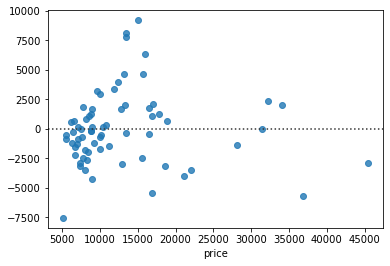

In [ ]:
scores(reg)
sns.residplot(y_test, y_test_predict)  
plt.show()

In [ ]:
y_test_predict

array([ 6506.38458359,  8235.04224302, 24449.03420776, 40304.87447904,
       20515.31045122,  5704.04556704,  6090.83810525,  7734.11776794,
       15686.98448926, 13239.69112495,  7123.54049876, 22504.20755413,
       21967.07961054,  5380.98740917,  8101.39314684, 18334.56886751,
       15431.33657695,  9266.5095305 , 21600.00439175, 11571.22265459,
        8880.23812225, 10259.74076168,  5960.51051473,  7080.60804812,
       19072.50389524, 18149.08480084, 10316.96447823,  9887.09883694,
       30324.15214437, 13506.52759073, 10841.24235561, 13548.90453641,
        9795.6683504 ,  5976.99504536,  6363.57725253, 13509.698274  ,
       10274.58753255, 16835.0998228 , 11054.08899907, 18242.02866792,
       29681.9349013 ,  8701.09669494, 25978.08816636, 16192.86409929,
       18030.67243584, 19499.44310799,  9344.17532702, 11684.67491294,
       10315.4377731 , 34715.84714635, 19237.11301954, 16865.10945293,
       10419.32372423,  7041.49307325, 15691.82084901,  5289.25993565,
      

# Poly_reg

In [ ]:
reglin_poly=LinearRegression()
pf=PolynomialFeatures()     #Linear Equation of degree 2
X_poly=pf.fit_transform(X) 
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size = 0.33, random_state=42)
reglin_poly.fit(X_train, Y_train)
y_test_predict =reglin_poly.predict(X_test)

In [ ]:
scores(reglin_poly)

rmse is 140256.4777238957 
r2 is -229.32801678305051 
mae is  68273.47949687358 
r2 ajusted is 108.9159239473034


In [ ]:
y_test_predict

array([ -61397.76571816,   61999.56153677,    9317.7578192 ,
         10179.69390707,  -59633.97035989,   16801.14630115,
        103501.32234452,    9515.34308255,   16218.19038944,
        -20228.59173164,  -68010.01075573,   12418.91248125,
        126625.26152929,    9425.23310438,  885805.43021849,
         68463.99783291,  360560.39652006,   12055.71666573,
          7068.02102858,   -4424.37660794,   10244.99999986,
         37295.78983913,    4552.76744674,  -65586.93145248,
          7609.00000748,   78588.47113906,    9805.80521444,
         48096.45502992,   -3209.53299927,   47887.79022024,
         -2655.04804544,    9428.08579075,  -66721.53438291,
        -29663.86108783,   12423.16561329, -369881.73485507,
       -125844.33925855,   12088.918818  ,   28861.45139417,
         14964.55060415,   49968.69517414,  182106.20453581,
         10331.93737034,    7412.2613519 ,    5888.24477128,
          5807.11049558,    9428.08579075,   20713.40456837,
         17949.99996957,

# Reglin Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
def BuildModel():
 model = Sequential()
 model.add(Dense(128, input_dim=5,activation='relu')) 
 model.add(Dense(32, activation='relu')) 
 model.add(Dense(8,activation='relu')) 
 model.add(Dense(1,activation='linear'))
 model.compile(loss="mean_squared_error", optimizer="adam")   
 return model

In [ ]:
BuildModel().summary()

In [ ]:
regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=100,batch_size=3)
regressor.fit(X_train, Y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
scores(regressor)

# Reglin preprocessing features selection
 

## Corellation feature selection on simple

Corellation Feature symboling: 0.67
Corellation Feature wheelbase: 66.695
Corellation Feature carlength: 124.34
Corellation Feature carwidth: 228.685
Corellation Feature carheight: 1.446
Corellation Feature curbweight: 382.206
Corellation Feature enginesize: 539.984
Corellation Feature boreratio: 65.876
Corellation Feature stroke: 1.343
Corellation Feature compressionratio: 1.193
Corellation Feature horsepower: 262.002
Corellation Feature peakrpm: 2.117
Corellation Feature citympg: 131.605
Corellation Feature highwaympg: 140.521
Corellation Feature n_fueltype_is_diesel: 2.02
Corellation Feature n_aspiration_is_turbo: 5.237
Corellation Feature n_doornumber: 0.003
Corellation Feature n_enginelocation_is rear: 16.561
Corellation Feature n_cylindernumber: 80.295


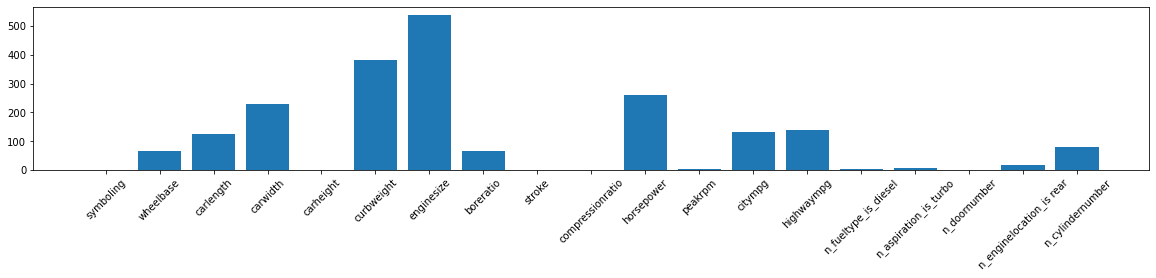

<Figure size 1080x648 with 0 Axes>

<function sklearn.feature_selection._univariate_selection.f_regression(X, y, *, center=True)>

In [28]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt

def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_regression, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
	print(f'Corellation Feature {X.columns[i]}: { round(fs.scores_[i],3)}')
plt.bar(X.columns, fs.scores_)
plt.xticks(rotation=45)
plt.figure(figsize=(15,9))
plt.show()
list_corr_feature = []



## Mutual info Feature selection

Mutual info Feature symboling: 0.201
Mutual info Feature wheelbase: 0.569
Mutual info Feature carlength: 0.531
Mutual info Feature carwidth: 0.671
Mutual info Feature carheight: 0.187
Mutual info Feature curbweight: 0.946
Mutual info Feature enginesize: 0.744
Mutual info Feature boreratio: 0.374
Mutual info Feature stroke: 0.093
Mutual info Feature compressionratio: 0.161
Mutual info Feature horsepower: 0.835
Mutual info Feature peakrpm: 0.142
Mutual info Feature citympg: 0.755
Mutual info Feature highwaympg: 0.805
Mutual info Feature n_fueltype_is_diesel: 0.023
Mutual info Feature n_aspiration_is_turbo: 0.089
Mutual info Feature n_doornumber: 0.021
Mutual info Feature n_enginelocation_is rear: 0.007
Mutual info Feature n_cylindernumber: 0.311


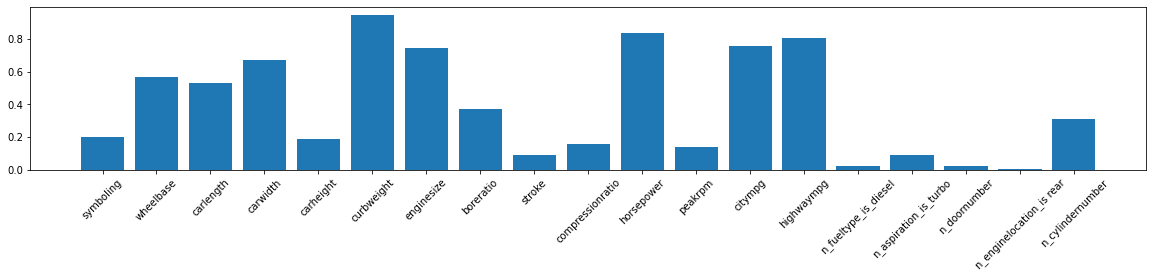

<Figure size 1080x648 with 0 Axes>

In [26]:
from sklearn.feature_selection import mutual_info_regression
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
	print(f'Mutual info Feature {X.columns[i]}: { round(fs.scores_[i],3)}')
plt.bar(X.columns, fs.scores_)
plt.xticks(rotation=45)
plt.figure(figsize=(15,9))
plt.show()

# Linear regression with best features 